# Importing all required packages

In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
words = open(r'E:\DATASETS\names.txt','r').read().split()

# Data analysis

In [3]:
words[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [4]:
len(words)

32033

In [5]:
#min len name
min([len(i) for i in words])

2

In [6]:
#max len name 
max([len(i) for i in words])

15

In [7]:
#unique character
print(set(''.join(words)))
print(len(set(''.join(words))))

{'w', 'i', 'k', 'a', 'p', 'h', 'o', 's', 'f', 'j', 'r', 'z', 'x', 'n', 'g', 'l', 'u', 'e', 'b', 't', 'q', 'v', 'y', 'c', 'm', 'd'}
26


In [8]:
#create  bigrams using dictionary
#adding special characters the way we do in most of the language models (text generation)
b={}
for word in words:
    chs =['<S>'] + list(word) +['<E>']
    for ch1 , ch2 in zip(chs, chs[1:]):
        bigram = (ch1,ch2)
        b[bigram]=b.get(bigram,0)+1

In [9]:
sorted(b.items() ,key= lambda kv: -kv[1]) # using negative to descending order and applying filter on count as we 
#want to sort values on the basis of the counts

[(('n', '<E>'), 6763),
 (('a', '<E>'), 6640),
 (('a', 'n'), 5438),
 (('<S>', 'a'), 4410),
 (('e', '<E>'), 3983),
 (('a', 'r'), 3264),
 (('e', 'l'), 3248),
 (('r', 'i'), 3033),
 (('n', 'a'), 2977),
 (('<S>', 'k'), 2963),
 (('l', 'e'), 2921),
 (('e', 'n'), 2675),
 (('l', 'a'), 2623),
 (('m', 'a'), 2590),
 (('<S>', 'm'), 2538),
 (('a', 'l'), 2528),
 (('i', '<E>'), 2489),
 (('l', 'i'), 2480),
 (('i', 'a'), 2445),
 (('<S>', 'j'), 2422),
 (('o', 'n'), 2411),
 (('h', '<E>'), 2409),
 (('r', 'a'), 2356),
 (('a', 'h'), 2332),
 (('h', 'a'), 2244),
 (('y', 'a'), 2143),
 (('i', 'n'), 2126),
 (('<S>', 's'), 2055),
 (('a', 'y'), 2050),
 (('y', '<E>'), 2007),
 (('e', 'r'), 1958),
 (('n', 'n'), 1906),
 (('y', 'n'), 1826),
 (('k', 'a'), 1731),
 (('n', 'i'), 1725),
 (('r', 'e'), 1697),
 (('<S>', 'd'), 1690),
 (('i', 'e'), 1653),
 (('a', 'i'), 1650),
 (('<S>', 'r'), 1639),
 (('a', 'm'), 1634),
 (('l', 'y'), 1588),
 (('<S>', 'l'), 1572),
 (('<S>', 'c'), 1542),
 (('<S>', 'e'), 1531),
 (('j', 'a'), 1473),
 (

# Creating bigram data tensor which we can use as look up table 

In [10]:
N= torch.zeros((28,28),dtype=torch.int32) #creating tensor of size 27-26 character and 2 special character 

In [11]:
chars = sorted(list(set(''.join(words))))

#creating character to index and index to character dictionary
ctoi={char:index for index , char  in enumerate(chars)}
ctoi['<S>']=26
ctoi['<E>']=27
itoc={index:char for char , index in ctoi.items()}
print(ctoi)
print(itoc)
 #adding special character
    

{'a': 0, 'b': 1, 'c': 2, 'd': 3, 'e': 4, 'f': 5, 'g': 6, 'h': 7, 'i': 8, 'j': 9, 'k': 10, 'l': 11, 'm': 12, 'n': 13, 'o': 14, 'p': 15, 'q': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'x': 23, 'y': 24, 'z': 25, '<S>': 26, '<E>': 27}
{0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 19: 't', 20: 'u', 21: 'v', 22: 'w', 23: 'x', 24: 'y', 25: 'z', 26: '<S>', 27: '<E>'}


In [12]:
# we can fill our bigrams into N tensors
for word in words:
    word =['<S>'] + list(word) +['<E>']
    for ch1 , ch2 in zip(word, word[1:]):
        indx1=ctoi[ch1]
        indx2=ctoi[ch2]
        N[indx1,indx2]+=1

# Visualization of the bigrams tensor

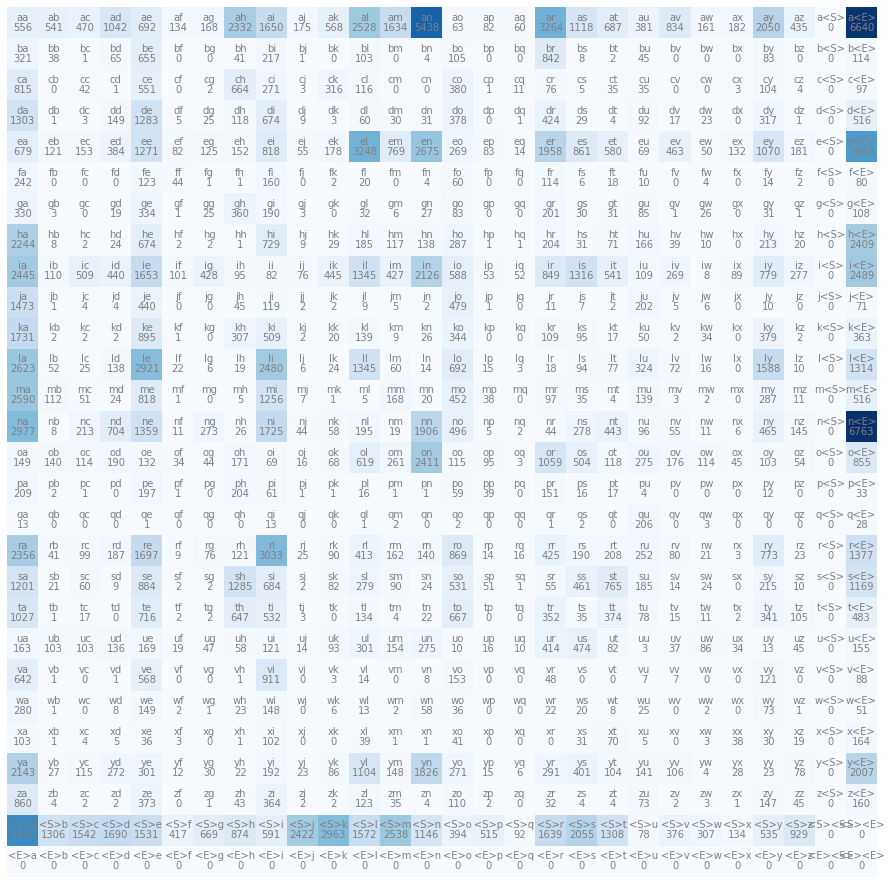

In [13]:
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(28):
    for j in range(28):
        chstr = itoc[i] + itoc[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

#here we can notice one thing below that no word can start with <E> and no word can end with <S> to overcome this we can 
#replace these 2 token with a single special token

# Creating bigrams using tensors approach 


In [14]:
N= torch.zeros((27,27),dtype=torch.int32) #creating tensor of size 27 

chars = sorted(list(set(''.join(words))))
#creating character to index and index to character dictionary
ctoi={char:index+1 for index , char  in enumerate(chars)}
ctoi['.']=0
itoc={index:char for char , index in ctoi.items()}
print(ctoi)
print(itoc)
 #adding special character
    

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26, '.': 0}
{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z', 0: '.'}


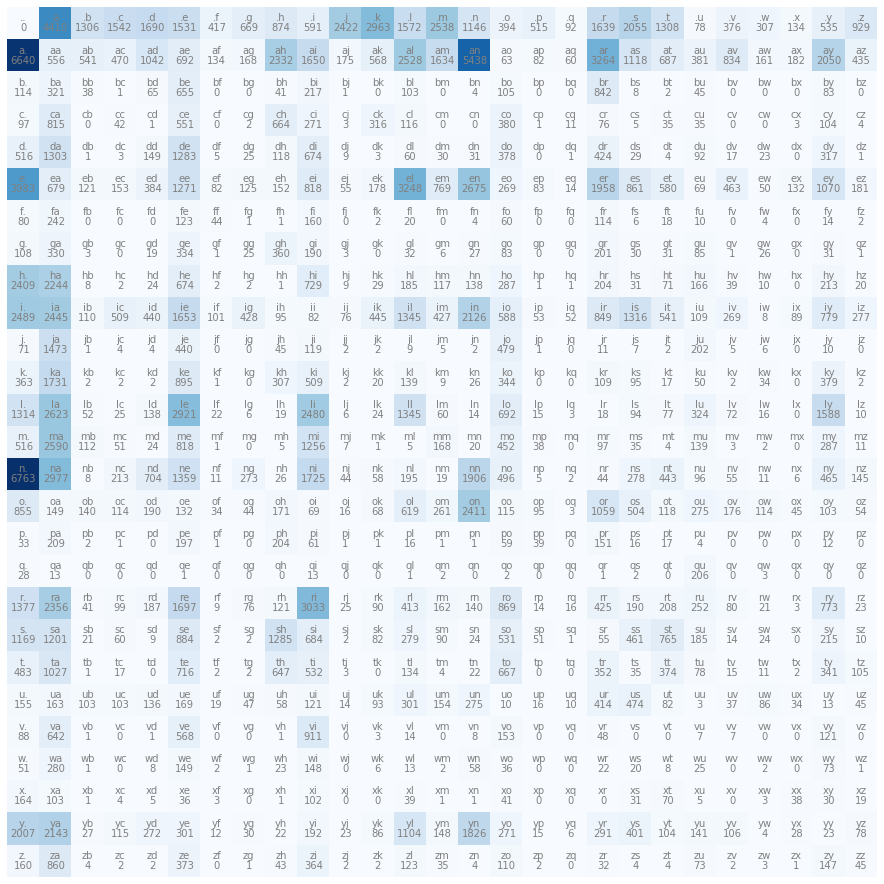

In [15]:
# we can fill our bigrams into N tensors
for word in words:
    chs =['.'] + list(word) +['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        #print(ch1)
        indx1=ctoi[ch1]
        indx2=ctoi[ch2]
        N[indx1,indx2]+=1
        
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(N, cmap='Blues')
for i in range(27):
    for j in range(27):
        chstr = itoc[i] + itoc[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');


In [16]:
p=N[0].float() / N[0].float().sum() #normalizing data  / creating probability distribution
print(p)
print(p.sum())

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])
tensor(1.)


In [17]:
gen=torch.Generator().manual_seed(2147483647) # setting manual seed so that we can get same results on every run
p=torch.tensor([10.0,30.0,60.0])
p=p/p.sum()
print(p)
torch.multinomial(p, num_samples=100, replacement=True, generator=gen) #here we are creating multinomial distribution using 
#our probability distribution and we can see below that the kind of distribution we are getting in that distribution
#60 percent of the data is 2 , 30 percent of the data is 1 and 10 percent of the data is 0.
torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item() 
for  i in range(5):
    print(torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item()) #in loop it will generate 
    #different numbers but in same order everytime , i.e if we want 5 element will get different 5 but in same order everytime

tensor([0.1000, 0.3000, 0.6000])
1
1
2
2
1


In [18]:
torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item()

2

# Generating names

In [19]:
#some name generation
#we can also develope a normalized tensor itself at very starting 
P=N.float()
P/=P.sum(1,keepdims=True) #for this broadcasting we  can refer to pytorch broadcasting semantics 
gen=torch.Generator().manual_seed(2147483647)

for i in range(5):
    idx=0 #index of special character 
    names=[]
    while True:
        p=P[idx]
#         p=p[idx].float()
#         p=p/p.sum() #normalizing our values we can also use this instead of creating P tensor will get the same result
        idx= torch.multinomial(p, num_samples=1, replacement=True, generator=gen).item()
        names.append(itoc[idx])
        if idx==0:
            break
    print(''.join(names))



mor.
axx.
minaymoryles.
kondlaisah.
anchshizarie.


In [20]:
#calculating loss and optimization
# GOAL: maximize likelihood of the data w.r.t. model parameters (statistical modeling)
# equivalent to maximizing the log likelihood (because log is monotonic)
# equivalent to minimizing the negative log likelihood
# equivalent to minimizing the average negative log likelihood
P[0]

tensor([0.0000, 0.1377, 0.0408, 0.0481, 0.0528, 0.0478, 0.0130, 0.0209, 0.0273,
        0.0184, 0.0756, 0.0925, 0.0491, 0.0792, 0.0358, 0.0123, 0.0161, 0.0029,
        0.0512, 0.0642, 0.0408, 0.0024, 0.0117, 0.0096, 0.0042, 0.0167, 0.0290])

In [21]:
log_likelihood = 0.0
n = 0
for word  in ["padrickq"]:
    chs =['.'] + list(word) +['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        #print(ch1)
        indx1=ctoi[ch1]
        indx2=ctoi[ch2]
        p=P[indx1,indx2]
        #we can calculate log of likelihood 
        logprob=torch.log(p) #we are using log to get a large likelihood number (likelihood= prob1 * prob2*.......)
        #after appling log we will get larger value 
        #log(a*b*c) = log(a) + log(b) + log(c) will follow this rule of calculating log likelihood for our model
        log_likelihood+=logprob
        n+=1 #will use to normalize log_likelihood
        print("Prob={:.4f} and bigrams ={}{} and Log of prob={:.4f}".format(p,itoc[indx1],itoc[indx2],logprob))

print('Log_likelihood={}',format(log_likelihood))
nll = -log_likelihood #negative log_likelihood because we have this rule to reduce the loss and to follow that convention
#we are making this positive
print('negative log likelihood={}'.format(nll))
print('normalized log likelihood={}'.format(nll/n))

#now we can clearly see that out log likehood is -inf and rest other values as well this is becuase log(0) in -inf and this
#happening because we have some pairs like a. that never come together to overcome this we can add fake count of 1 for such cases
#by changing this P=N.float() --->P=(N+1).float() like this 

Prob=0.0161 and bigrams =.p and Log of prob=-4.1304
Prob=0.2037 and bigrams =pa and Log of prob=-1.5911
Prob=0.0308 and bigrams =ad and Log of prob=-3.4818
Prob=0.0771 and bigrams =dr and Log of prob=-2.5620
Prob=0.2388 and bigrams =ri and Log of prob=-1.4320
Prob=0.0288 and bigrams =ic and Log of prob=-3.5489
Prob=0.0895 and bigrams =ck and Log of prob=-2.4139
Prob=0.0000 and bigrams =kq and Log of prob=-inf
Prob=0.1029 and bigrams =q. and Log of prob=-2.2736
Log_likelihood={} -inf
negative log likelihood=inf
normalized log likelihood=inf


In [22]:
P=(N+1).float() #ADDING 1 in our data so that we can resolve above issue 
P/=P.sum(1,keepdims=True) 
log_likelihood = 0.0
n = 0
for word  in ["padrickq"]:
    chs =['.'] + list(word) +['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        #print(ch1)
        indx1=ctoi[ch1]
        indx2=ctoi[ch2]
        p=P[indx1,indx2]
        #we can calculate log of likelihood 
        logprob=torch.log(p) 
        log_likelihood+=logprob
        n+=1 #will use to normalize log_likelihood
        print("Prob={:.4f} and bigrams ={}{} and Log of prob={:.4f}".format(p,itoc[indx1],itoc[indx2],logprob))

print('Log_likelihood={}',format(log_likelihood))
nll = -log_likelihood 
print('negative log likelihood={}'.format(nll))
print('normalized log likelihood={}'.format(nll/n))


Prob=0.0161 and bigrams =.p and Log of prob=-4.1293
Prob=0.1994 and bigrams =pa and Log of prob=-1.6123
Prob=0.0308 and bigrams =ad and Log of prob=-3.4817
Prob=0.0770 and bigrams =dr and Log of prob=-2.5646
Prob=0.2384 and bigrams =ri and Log of prob=-1.4338
Prob=0.0288 and bigrams =ic and Log of prob=-3.5485
Prob=0.0891 and bigrams =ck and Log of prob=-2.4183
Prob=0.0002 and bigrams =kq and Log of prob=-8.5305
Prob=0.0970 and bigrams =q. and Log of prob=-2.3331
Log_likelihood={} -30.052122116088867
negative log likelihood=30.052122116088867
normalized log likelihood=3.3391246795654297


# Loss on complete data 

In [52]:
#for complete data 
P=(N+1).float() #ADDING 1 in our data so that we can resolve above issue 
P/=P.sum(1,keepdims=True) 
log_likelihood = 0.0
n = 0
for word  in words:
    chs =['.'] + list(word) +['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        #print(ch1)
        indx1=ctoi[ch1]
        indx2=ctoi[ch2]
        p=P[indx1,indx2]
        #we can calculate log of likelihood 
        logprob=torch.log(p) 
        log_likelihood+=logprob
        n+=1 #will use to normalize log_likelihood
        #print("Prob={:.4f} and bigrams ={}{} and Log of prob={:.4f}".format(p,itoc[indx1],itoc[indx2],logprob))

print('Log_likelihood={}',format(log_likelihood))
nll = -log_likelihood 
print('negative log likelihood={}'.format(nll))
print('normalized log likelihood={}'.format(nll/n))


Log_likelihood={} -559951.5625
negative log likelihood=559951.5625
normalized log likelihood=2.4543561935424805


# Model Development using Neural  network

In [23]:
#creating x , y for training
x_train=[]
y_train=[]
for word  in words[:1]:
    chs =['.'] + list(word) +['.']
    for ch1 , ch2 in zip(chs, chs[1:]):
        #print(ch1)
        indx1=ctoi[ch1]
        indx2=ctoi[ch2]
        x_train.append(indx1)
        y_train.append(indx2)
        
x_train=torch.tensor(x_train)
y_train = torch.tensor(y_train)
print(x_train)

print(y_train)

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])


In [24]:
import torch.nn.functional as F
x_train_enc = F.one_hot(x_train, num_classes=27).float() #before feeding data for training we have to change into this 
#format same practice we follow everytime 
print(x_train_enc)
print(x_train_enc.shape)

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0.]])
torch.Size([5, 27])


In [25]:
#creating weight randomly 
W = torch.randn((27, 1))
logits=x_train_enc @ W#[5,27] * [27,1]--->[5,1]
print(logits)
print(logits.exp())

tensor([[-0.5785],
        [-0.3738],
        [-0.6295],
        [-0.6295],
        [-0.5367]])
tensor([[0.5607],
        [0.6881],
        [0.5328],
        [0.5328],
        [0.5847]])


In [26]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g)

xenc = F.one_hot(x_train, num_classes=27).float() # input to the network: one-hot encoding
logits = xenc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N #we are doing this to make these values same as count of bigram we calculated
#earlier refer matplotlib image for the count , because some logits will be negative and count of bigrams cant be negative
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
# btw: the last 2 lines here are together called a 'softmax'

In [27]:
probs.shape

torch.Size([5, 27])

In [28]:
nlls = torch.zeros(5)
for i in range(5):
  # i-th bigram:
  x = x_train[i].item() # input character index
  y = y_train[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itoc[x]}{itoc[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .e (indexes 0,5)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
        0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
        0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459])
label (actual next character): 5
probability assigned by the net to the the correct character: 0.012286253273487091
log likelihood: -4.3992743492126465
negative log likelihood: 4.3992743492126465
--------
bigram example 2: em (indexes 5,13)
input to the neural net: 5
output probabilities from the neural net: tensor([0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
        0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
        0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472])
label (actual next character): 13
probability assigned by the net to the the correct character:

# Model Optmization

In [33]:
print(x_train)
print(y_train)
print(probs)
print('predicted probability ',probs[0,5]) #means when we are taking of all probs from index 0 which represents x_train(0)
#so and so forth probs[1,13] -->probs of x[5]-->[1,27] values and y[13]
#and y_train is 5 will get this result which is  nothing
#but the predicted prob from our model same goes for rest all of the values 

tensor([ 0,  5, 13, 13,  1])
tensor([ 5, 13, 13,  1,  0])
tensor([[0.0607, 0.0100, 0.0123, 0.0042, 0.0168, 0.0123, 0.0027, 0.0232, 0.0137,
         0.0313, 0.0079, 0.0278, 0.0091, 0.0082, 0.0500, 0.2378, 0.0603, 0.0025,
         0.0249, 0.0055, 0.0339, 0.0109, 0.0029, 0.0198, 0.0118, 0.1537, 0.1459],
        [0.0290, 0.0796, 0.0248, 0.0521, 0.1989, 0.0289, 0.0094, 0.0335, 0.0097,
         0.0301, 0.0702, 0.0228, 0.0115, 0.0181, 0.0108, 0.0315, 0.0291, 0.0045,
         0.0916, 0.0215, 0.0486, 0.0300, 0.0501, 0.0027, 0.0118, 0.0022, 0.0472],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133, 0.0203, 0.1204, 0.0469, 0.0126],
        [0.0312, 0.0737, 0.0484, 0.0333, 0.0674, 0.0200, 0.0263, 0.0249, 0.1226,
         0.0164, 0.0075, 0.0789, 0.0131, 0.0267, 0.0147, 0.0112, 0.0585, 0.0121,
         0.0650, 0.0058, 0.0208, 0.0078, 0.0133,

In [41]:
# randomly initialize 27 neurons' weights. each neuron receives 27 inputs
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True) #require grad is true because we want to 
#calculate gradient for the

In [46]:
#weights
# forward pass
x_train_enc = F.one_hot(x_train, num_classes=27).float() # input to the network: one-hot encoding
logits = x_train_enc @ W # predict log-counts
counts = logits.exp() # counts, equivalent to N
probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
loss = -probs[torch.arange(5), y_train].log().mean() #same mean negative log likelihood

#this loss is same as cross entropy but calculation is little bit different
#we are using arange to get index upto 5 [0,1,2,3,4] --> which helps us to use  [5,27] probs value each index represents 
#x_train values repesctively 
print(loss.item())

3.7492127418518066


In [44]:
# backward pass
W.grad = None # set to zero the gradient
loss.backward()

In [45]:
W.data += -0.1 * W.grad #updating weights
#before updating loss was 3.7693049907684326
#after updating loss is 3.7693049907684326

# Running end to end process with optimization 
## Creating data for training

In [48]:
# create the dataset
x_train, y_train = [], []
for w in words:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    index1 = ctoi[ch1]
    index2 = ctoi[ch2]
    x_train.append(index1)
    y_train.append(index2)
x_train = torch.tensor(x_train)
y_train = torch.tensor(y_train)
num = x_train.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((27, 27), generator=g, requires_grad=True)

number of examples:  228146


# Training Loop

In [55]:
#gradient descent
#first run on 100 
#then 20
#then 60
#then 100  -->we almost close to the actual loss we are getting using statistical model can check above also
for k in range(100):
  
  # forward pass
  x_train_enc = F.one_hot(x_train, num_classes=27).float() # input to the network: one-hot encoding
  logits = x_train_enc @ W # predict log-counts
    #if W is zero then logits will be 0 and logits.exp() will become 1 and then will get equally distributed probs
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), y_train].log().mean() + 0.01*(W**2).mean()#0.01*(W**2).mean() adding smoothing
#here to get smooth distribution same as regularization
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

2.483567953109741
2.483536958694458
2.4835031032562256
2.483469009399414
2.4834344387054443
2.4833998680114746
2.483370065689087
2.4833390712738037
2.4833076000213623
2.483278751373291
2.483248233795166
2.483219861984253
2.483189582824707
2.48315691947937
2.483128786087036
2.483102560043335
2.4830739498138428
2.4830474853515625
2.483022928237915
2.4829952716827393
2.4829695224761963
2.482943058013916
2.482919454574585
2.4828951358795166
2.482869863510132
2.4828453063964844
2.482821226119995
2.4827959537506104
2.4827749729156494
2.4827523231506348
2.482728958129883
2.482707977294922
2.4826860427856445
2.482666492462158
2.48264479637146
2.482621669769287
2.4826018810272217
2.482581377029419
2.4825613498687744
2.482541084289551
2.4825174808502197
2.4824976921081543
2.482480049133301
2.482457160949707
2.4824376106262207
2.4824166297912598
2.4823999404907227
2.4823806285858154
2.482361078262329
2.4823451042175293
2.4823272228240967
2.482311725616455
2.482295513153076
2.48227858543396
2.4822

# Generating Results using Neural network model 

In [58]:
# finally, sample from the 'neural net' model
g = torch.Generator().manual_seed(2147483647)

for i in range(5):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=27).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itoc[ix])
    if ix == 0:
      break
  print(''.join(out))
#here we are getting almost same result as we were getting using statistical modelling so this neural network approach
#is more scalable as we can run our training for more epochs which can reduce the overall loss.

mor.
axx.
minaymoryles.
kondlaisah.
anchthizarie.


In [5]:
x=[2,1,4]
x=[i/7 for i in x]

In [6]:
x

[0.2857142857142857, 0.14285714285714285, 0.5714285714285714]

In [7]:
sum(x)

1.0